In [1]:
import os
import sys
from os.path import join
import numpy as np
import cv2
import pandas as pd
from __future__ import division

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
### read in list of stim number -> stim name mappings
stimNames = pd.read_csv('AOIstims/stimList.csv')

In [4]:
stimNames.columns

Index([u'imageIdx', u'imgName'], dtype='object')

In [5]:
stimNames.imgName[stimNames.imageIdx==0].values[0]

'hmnBG_23.jpg'

### Combine single instances of same AOI

In [6]:
from matplotlib import cm
from matplotlib import colors

### for a single image

In [89]:
AOIs = ['leftEye', 'rightEye', 'nose', 'mouth']
img = 38


# get the stim filename for this image, read in image data
stim_fname = stimNames.imgName[stimNames.imageIdx==img].values[0]
thisStim = cv2.imread(join('AOIstims', stim_fname))
stimDims = thisStim.shape

# read in stim
thisStim = cv2.imread(join('AOIstims', stim_fname))

######### Sum all different versions of this AOI
AOIs_summed = {}
for AOI in AOIs:
    # get list of all different versions of this AOI
    searchPattern = 'raw_AOIs/*_img' + str(img) + '_' + AOI + '.png'
    subjAOIs = glob.glob(searchPattern)

    # make sure at least one match before continuing
    if len(subjAOIs) > 0:
        n_versions = len(subjAOIs)

        # overlay all unique subj drawn AOIs for this AOI
        for i,subjAOI in enumerate(subjAOIs):
            # read in the specific AOI
            thisIm = cv2.imread(subjAOI)

            # convert to grayscale
            thisIm = cv2.cvtColor(thisIm, cv2.COLOR_BGR2GRAY)

            # mask
            thisIm[thisIm > 0] = 1

            # combine
            if i == 0:
                combinedImg = thisIm.copy()
            else:
                combinedImg = combinedImg + thisIm

        # crop combined AOI img to match stim dimensions
        combinedImg = combinedImg[:stimDims[0], :stimDims[1]]

        # write image showing individual subj AOIs overlaid on image
        AOIs_summed[AOI] = combinedImg
    


### show all AOIS

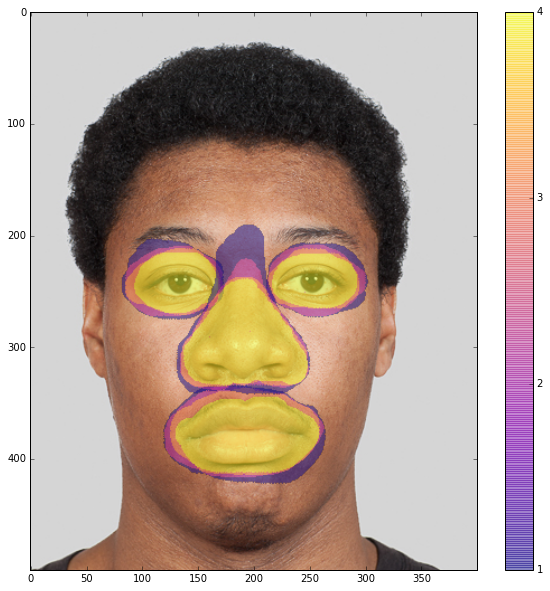

In [85]:

######## Write out reference image for this AOI
# prep background image
thisStim = cv2.imread(join('AOIstims', stim_fname))
thisStim = cv2.cvtColor(thisStim, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(thisStim)

# add each AOI to the plot
for AOI in AOIs_summed.keys():
    thisAOI = AOIs_summed[AOI]
    #thisAOI[thisAOI > 0] = 1
    scaleFactor = 255/thisAOI.max()
    thisAOI = thisAOI * scaleFactor
    thisAOI[thisAOI == 0] = np.nan

    plt.imshow(thisAOI, cmap='plasma', alpha=.5)
figName = stim_fname.split('.')[0] + '_allAOIs.pdf'
cbar = plt.colorbar(ticks=np.linspace(0,255,5))
cbar.ax.set_yticklabels(['1', '2', '3', '4'])



### Clean up and filter AOI

In [68]:
from matplotlib.colors import LinearSegmentedColormap

rightEye
mouth
nose


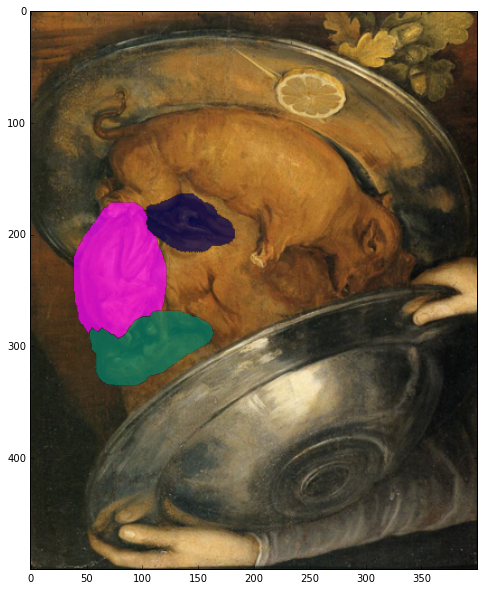

In [90]:
### remove AOI pixels where less than 2 subjects agreed
for AOI in AOIs_summed.keys():
    AOIs_summed[AOI][AOIs_summed[AOI]<2] = 0

####### Process AOI
AOIs_summed_new = {}
for AOI1 in AOIs_summed.keys():
    overlay = AOIs_summed[AOI1]
    for AOI2 in AOIs_summed.keys():
        if AOI1 != AOI2:
            underlay = AOIs_summed[AOI2]
            underlay[overlay>=underlay] = 0    # tie goes to the overlay
            AOIs_summed_new[AOI2] = underlay

for AOI in AOIs_summed_new.keys():
    if AOI == 'rightEye':
        AOIs_summed_new[AOI][AOIs_summed_new[AOI]>0] = 1
    elif AOI == 'leftEye':
        AOIs_summed_new[AOI][AOIs_summed_new[AOI]>0] = 2
    elif AOI == 'nose':
        AOIs_summed_new[AOI][AOIs_summed_new[AOI]>0] = 3
    elif AOI == 'mouth':
        AOIs_summed_new[AOI][AOIs_summed_new[AOI]>0] = 4 



# prep background image
thisStim = cv2.imread(join('AOIstims', stim_fname))
thisStim = cv2.cvtColor(thisStim, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(thisStim)


colors = [(1, .3, .2), (1, .5, .4), (0, 1, .2), (.2, .4, 1)]
cmap_name = 'AOIcolors'
colors = ['seismic', 'summer', 'spring', 'autumn']


# add each AOI to the plot
for i,AOI in enumerate(AOIs_summed_new.keys()):
    print AOI
    thisAOI = AOIs_summed_new[AOI]
    #thisAOI[thisAOI > 0] = 1
    scaleFactor = 255/4
    thisAOI = thisAOI * scaleFactor
    thisAOI[thisAOI == 0] = np.nan
    
    #cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)
    plt.imshow(thisAOI, cmap=colors[i], alpha=.7)
    

In [110]:
tmp = AOIs_summed_new
final_AOI = np.zeros(shape=tmp[tmp.keys()[0]].shape)
for AOI in tmp:
    final_AOI = final_AOI + tmp[AOI]
np.unique(final_AOI)

array([   0.,    1.,    3.,  255.])

In [111]:
AOI = cv2.imread('finished_AOIs/dog02_AOIs.png')

In [112]:
np.unique(AOI)

array([  0,  64, 128, 191, 255], dtype=uint8)

In [115]:
AOI = AOI[:,:,0]

In [116]:
AOI[250, 300]

191